### 폰트

In [27]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [28]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/li

In [29]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [30]:
# 연산 처리  패키지
import pandas as pd
import numpy as np
import math

# 전처리 패키지
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 모델 패키지
from sklearn.linear_model import LogisticRegression, LinearRegression

# 평가지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### Data 불러오기

In [31]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# 데이터 읽어오기
df = pd.read_csv("/content/drive/MyDrive/기계학습의이해/LR/LR_결과/LR_파생변수_dataset.csv", encoding="euc-kr")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Model 함수 정의

In [32]:
# 로지스틱 회귀 함수
def logistic_classifier(X, y):

    # 평가지표 list
    auc = []
    acc_opt = []
    prec_opt = []
    recall_opt = []

    best_param = []
    opt_thres = []

    # 하이퍼파라미터 그리드 설정
    param_grid = {
        'C': [0.1, 1, 10]
    }

    # 멈추는 경우를 방지하려면 range 조절
    for i in range(100):

        # smote 전 data type 변환
        bool_mask = X.dtypes == np.bool_
        bool_cols = X.columns[bool_mask].tolist()

        for col_name in bool_cols:
            X[col_name] = X[col_name].astype(int)

        # y 범주 비율에 맞춰 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

        # 데이터 Random Sampling
        X_train_rd = X_train.sample(n = 15000)
        y_train_rd = y_train[X_train_rd.index]

        # SMOTE oversampling
        smt = SMOTE(sampling_strategy = 'auto')
        X_train_sm, y_train_sm = smt.fit_resample(X_train_rd, y_train_rd)

        # GridSearchCV를 사용한 하이퍼파라미터 튜닝
        CV_lr = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5)
        CV_lr.fit(X_train_sm, y_train_sm)

        # 최적의 파라미터 저장
        best_param.append(CV_lr.best_params_)

        # 테스트 데이터셋에 대한 예측 수행
        y_pred = CV_lr.predict(X_test)

        # AUC 계산, threshold 기준 평가를 위한 발생 확률 계산
        y_proba = CV_lr.predict_proba(X_test)[:, 1]

        # Optimal thr 저장
        fper, tper, thresholds = roc_curve(y_test, y_proba)
        optimal_idx = np.argmax(tper - fper)   # fpr, tpr 간 차이가 가장 클 때의 index 저장

        # Optimal thr일 때 평가지표 저장
        y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

        auc.append(roc_auc_score(y_test, y_proba))
        acc_opt.append(accuracy_score(y_test, y_optpred))
        prec_opt.append(precision_score(y_test, y_optpred))
        recall_opt.append(recall_score(y_test, y_optpred))

        opt_thres.append(thresholds[optimal_idx])

        # 횟수 출력
        if ((i+1)%10 == 0) :
            print(f"   {i+1}번째 완료")

    # 결과 DataFrame 생성
    results = pd.DataFrame({
        'accuracy' : acc_opt,
        'precision' : prec_opt,
        'recall' : recall_opt,
        'auc': auc,
        'best_param' : best_param,
        'threshold' : opt_thres
    })

    return results

### 튜닝 모델 실행

In [33]:
yn_X = df.drop(columns = ['사고유무'], axis = 1)
yn_y = df['사고유무']

In [34]:
# 처음 시작할 때
total = pd.DataFrame()

# 이미 실행한 게 있을 경우
# total = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/LR_튜닝결과.csv", encoding="euc-kr")


df_result = logistic_classifier(yn_X, yn_y)
df_reslut = pd.concat([total, df_result])

df_result.to_csv("/content/drive/MyDrive/기계학습의이해/LR/LR_튜닝결과.csv", index = False)

   10번째 완료
   20번째 완료
   30번째 완료
   40번째 완료
   50번째 완료
   60번째 완료
   70번째 완료
   80번째 완료
   90번째 완료
   100번째 완료


### 결과 확인

In [35]:
df_result.sort_values(by=["accuracy"], ascending = False).head(10)

,accuracy,precision,recall,auc,best_param,threshold
10,0.617906,0.203303,0.438111,0.562798,{'C': 0.1},0.258222
6,0.606424,0.204833,0.467461,0.567993,{'C': 1},0.213956
60,0.606162,0.202440,0.458812,0.566243,{'C': 0.1},0.230382
22,0.604546,0.203062,0.464483,0.565843,{'C': 1},0.223385
57,0.603785,0.203321,0.467035,0.566599,{'C': 0.1},0.242924
46,0.599577,0.203908,0.477953,0.567750,{'C': 10},0.216024
99,0.598103,0.204180,0.482064,0.572138,{'C': 0.1},0.234316
24,0.593610,0.202630,0.485042,0.568571,{'C': 0.1},0.238605
80,0.592587,0.205456,0.498653,0.573750,{'C': 0.1},0.240653
70,0.591684,0.203132,0.490997,0.567910,{'C': 10},0.211911


> Best Parameter

C :


In [36]:
df_result.drop(columns = ['best_param', 'threshold'], axis = 1).mean()

accuracy     0.523549
precision    0.196193
recall       0.591893
auc          0.568832
dtype: float64

### Boxplot

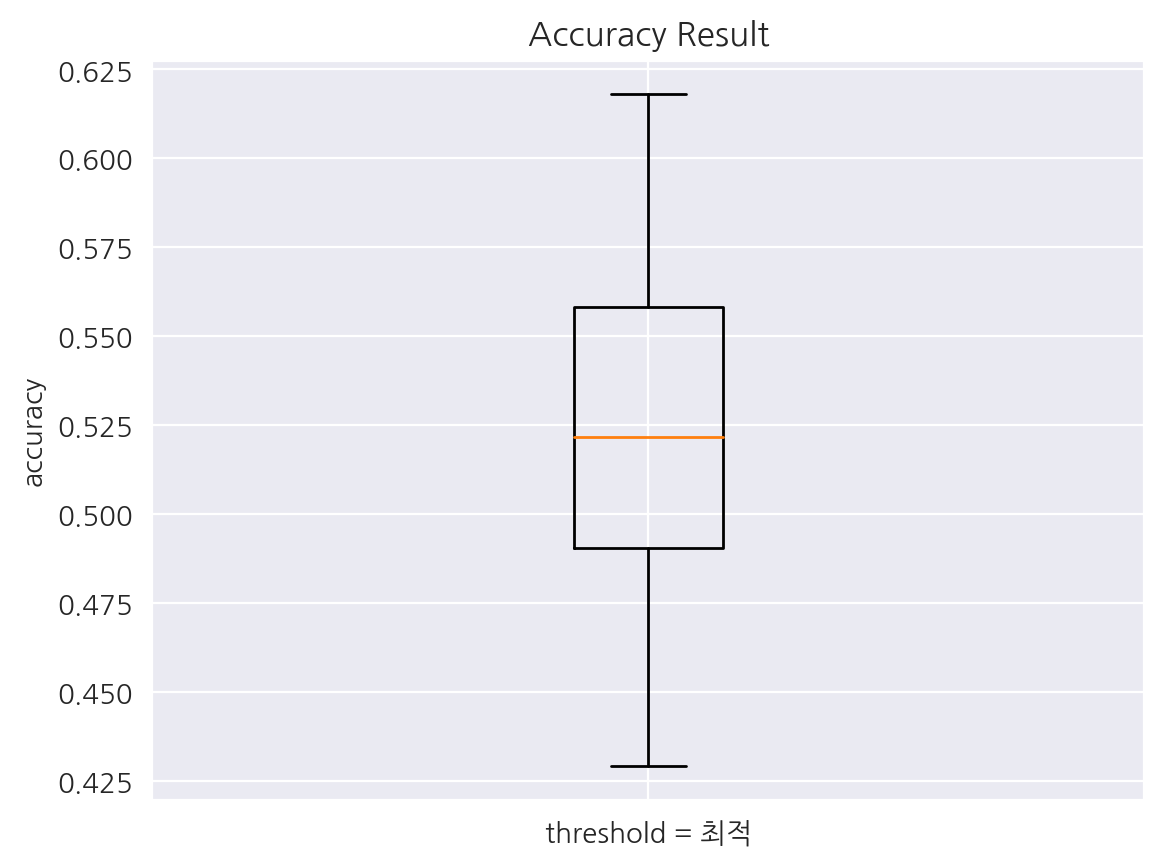

In [37]:
# boxplot 그리기
plt.boxplot(df_result['accuracy'])

# 그래프에 레이블 추가
plt.xticks([1], ['threshold = 최적'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('Accuracy Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

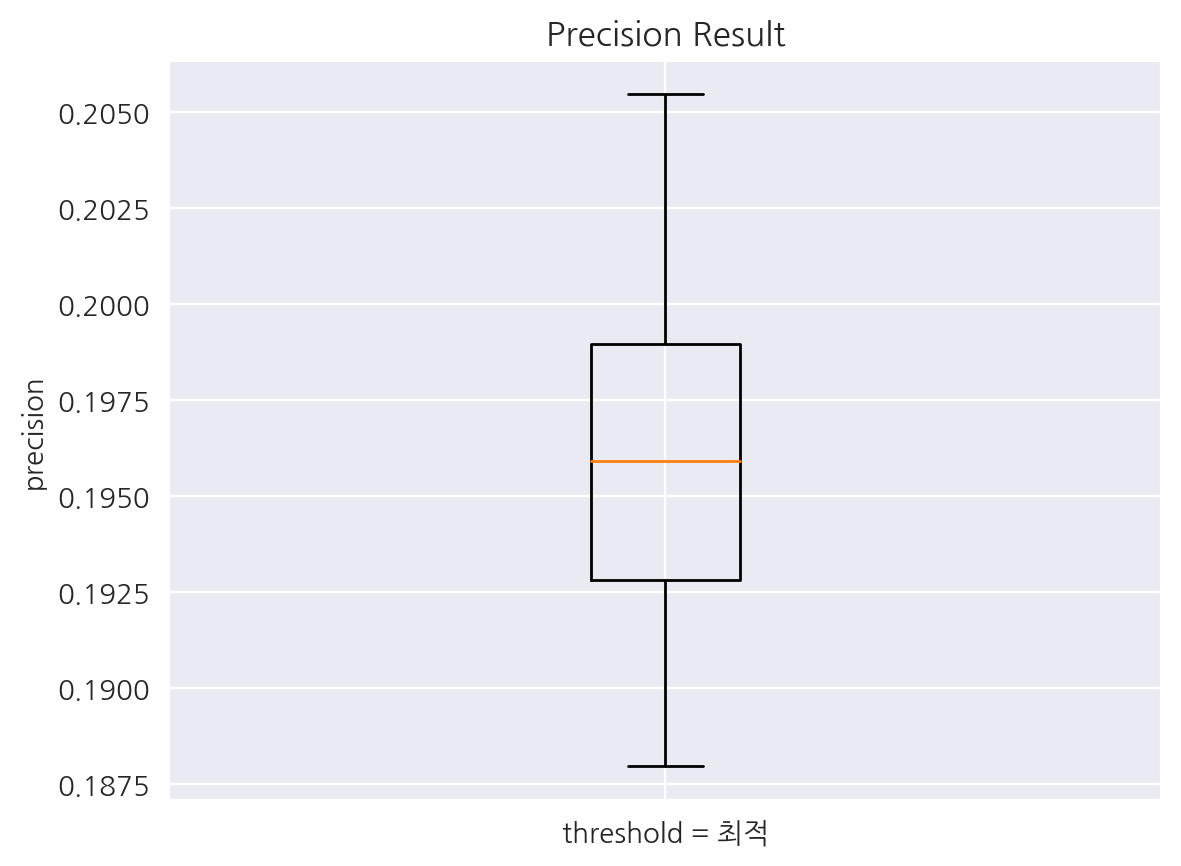

In [38]:
# boxplot 그리기
plt.boxplot(df_result['precision'])

# 그래프에 레이블 추가
plt.xticks([1], ['threshold = 최적'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('Precision Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

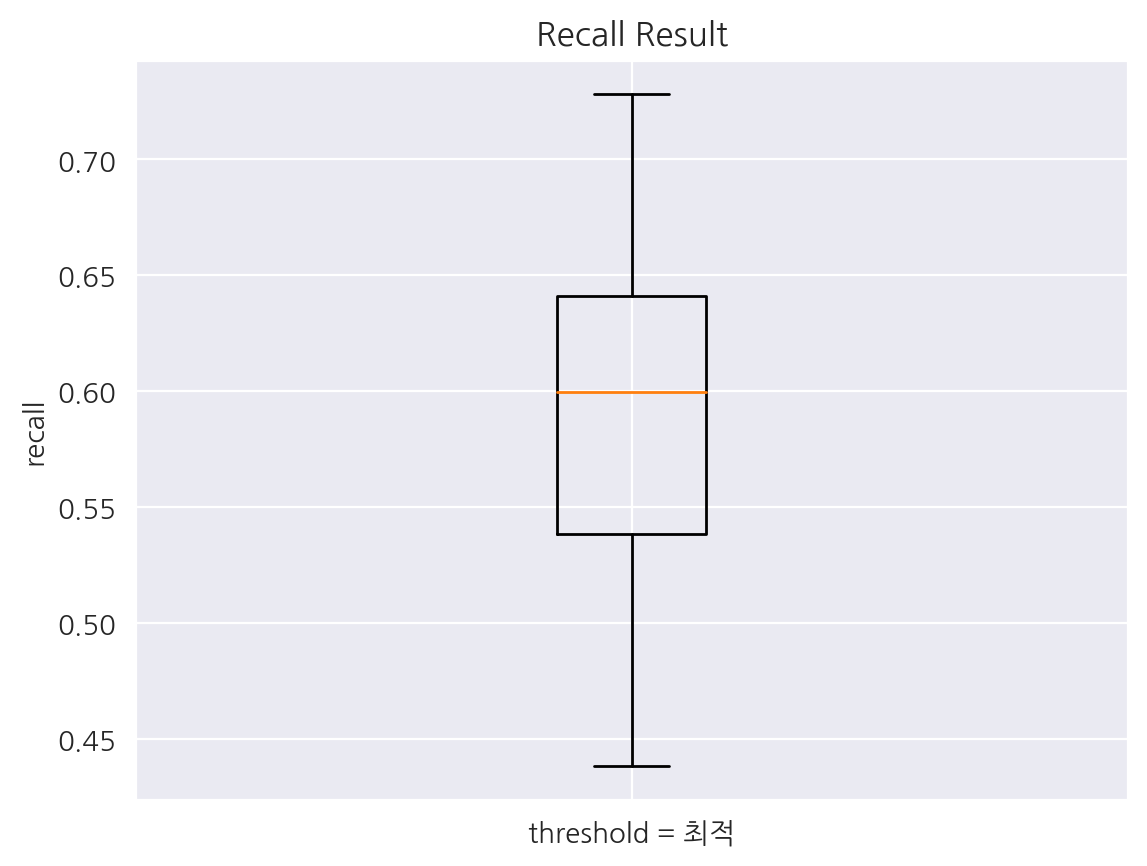

In [39]:
# boxplot 그리기
plt.boxplot(df_result['recall'])

# 그래프에 레이블 추가
plt.xticks([1], ['threshold = 최적'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('Recall Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()